# Reporte escrito 1

In [5]:
# Instala dependencias
install.packages("tidyverse")
install.packages("rstatix")

library(tidyverse)
library(rstatix)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter




En las respuestas deben indicar:

- Hipótesis de trabajo e hipótesis estadísticas, de manera correspondiente.
- Resultados de prueba de normalidad para las distribuciones de las variables de estudio.
- Indicadores estadísticos utilizados (SW, M, Mdn, DE, t, U, F, r) el valor p
correspondiente, y la magnitud según criterios de Cohen, de ser pertinente.
- Redacción de las conclusiones.

>Nota: reportar la normalidad de las distribuciones en base a la prueba Shapiro-Wilk. Para
efectos de este reporte, NO consideren asimetría y curtosis para decidir la prueba estadística a
utilizar

En una investigación sobre los recursos que facilitan la adaptación a la pandemia por COVID-19 en la adultez media (40 a 60 años) se contó con información sobre optimismo, mindfulness-rasgo y miedo al COVID-19. 

El estudio contó con la participación de 90 adultas, y adultos, quienes completaron el protocolo de estudio en línea. Además de los constructos de estudio, se recolectaron datos generales de sexo de las/los participantes, edad en años, si se encuentran en una relación de pareja, o no, y si consumen alcohol semanalmente.

In [2]:
df = haven::read_sav("https://github.com/renatoparedes/EstadisticaYPsicologiaMatematica/raw/main/INEE/BaseReporte1.sav")
df

Código,Edad,Sexo,Pareja,Cons_alcohol,Optimismo,Mindful,Miedo_COV
<chr>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>
001,53,1,1,1,47,37,55
002,49,1,0,0,36,39,41
003,57,2,1,1,54,25,42
004,55,2,0,0,68,38,53
005,52,1,0,0,50,42,46
006,53,2,0,0,56,30,50
007,48,2,1,1,60,42,42
008,52,1,1,0,54,34,56
009,54,2,0,0,60,28,55


## Pregunta 1

Las evidencias indican que existiría una diferencia en el nivel de **optimismo** según el **sexo de las/los participantes**, con las mujeres puntuando más bajo que los hombres. Plantea y lleva a cabo los análisis estadísticos correspondientes y describe lo encontrado (8 pts).                    

HT: Hay una diferencia en el nivel de optimismo en la muestra, con las mujeres puntuando más bajo que los hombres.
- H0: $\mu_{Mujeres}  = \mu_{Hombres}$
- H1: $\mu_{Mujeres}  < \mu_{Hombres}$


In [13]:
df %>%
  group_by(Sexo) %>%
  summarise(n = n(),
            mean = mean(Optimismo),
            sd = sd(Optimismo),
            min = min(Optimismo),
            "25%" = quantile(Optimismo, probs = .25),
            "50%" = quantile(Optimismo, probs = .50),
            "75%" = quantile(Optimismo, probs = .75),
            max = max(Optimismo)) %>% 
  mutate(Sexo = as_factor(Sexo))

Sexo,n,mean,sd,min,25%,50%,75%,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mujer,49,50.48980,9.169975,30,42,50,56,69
Hombre,41,54.92683,8.013708,38,49,54,60,68


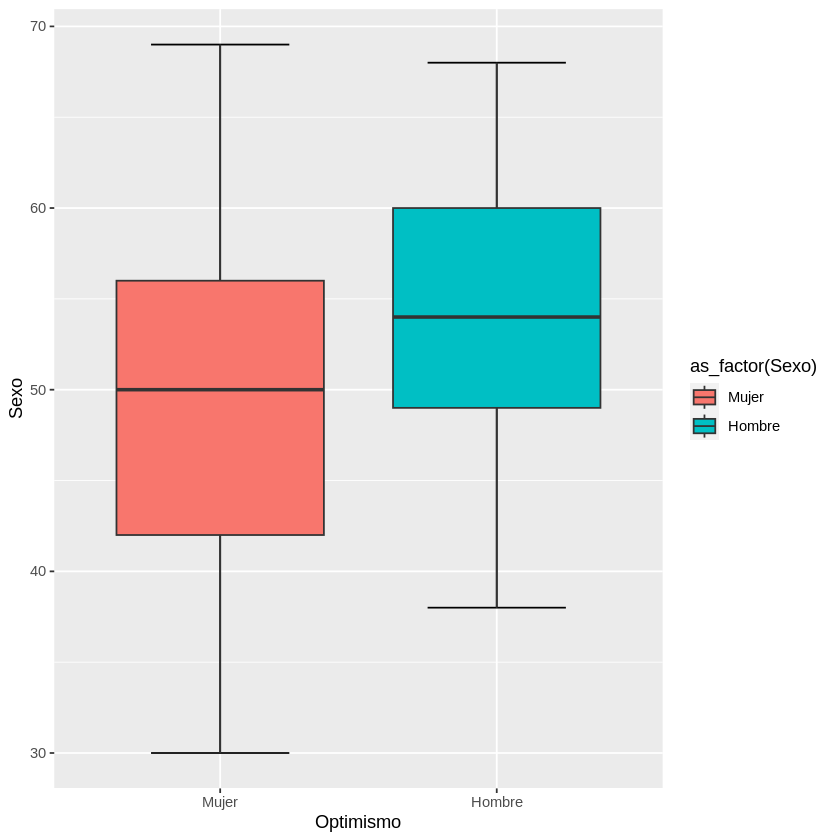

In [20]:
df %>%
  ggplot(aes(x = as_factor(Sexo), y = Optimismo, fill = as_factor(Sexo))) +
  stat_boxplot(geom = "errorbar", width = 0.5) +
  geom_boxplot() +
  labs(x = "Optimismo",
       y = "Sexo")

In [23]:
df %>%
  group_by(Sexo) %>%
  shapiro_test(Optimismo) %>%
  mutate(Sexo = as_factor(Sexo),
         normal = case_when(p > .05 ~ T, T ~ F))

Sexo,variable,statistic,p,normal
<fct>,<chr>,<dbl>,<dbl>,<lgl>
Mujer,Optimismo,0.9824511,0.6710492,TRUE
Hombre,Optimismo,0.9667755,0.2694410,TRUE


Las distribuciones de optimismo en mujeres (SW=.98, p=.67) como en hombres (SW=.97, p=.27) fueron normales. Por lo tanto, se usará el análisis paramétrico de contraste de dos muestras independientes t de Student.

In [28]:
df %>%
  mutate(Sexo = as_factor(Sexo)) %>%
  levene_test(Optimismo ~ Sexo)

df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
1,88,1.101196,0.2968773


La prueba de Levene resultó no significativa, F=1.10, p=.30, por lo que se asumen varianzas iguales entre los grupos.

In [29]:
df %>% 
  mutate(Sexo = as_factor(Sexo)) %>% 
  t_test(Optimismo ~ Sexo, alternative = "less", var.equal = T)

,.y.,group1,group2,n1,n2,statistic,df,p
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Optimismo,Mujer,Hombre,49,41,-2.419722,88,0.00879


El resultado del análisis de comparación fue significativo, t(88)=-2.42, p=.009 (unilateral), con las mujeres puntuando más bajo en optimismo (M=50.49, DE=9.17) que los hombres (M=54.93, DE=8.01).

En conclusión, los resultados apoyan la idea que el nivel de optimismo varía según el sexo de la, o el participante, con las mujeres puntuando más bajo que los hombres, en promedio. Así, la hipótesis de trabajo se cumple en el estudio.

## Pregunta 2

El grupo de investigación quiere conocer si el mindfulness rasgo reportado varía según si se consume alcohol, o no ¿Existen evidencias de ello en el estudio? (8 pts).

HT: El mindfulness rasgo variaría según se consume alcohol, o no.
- H0: $\mu_{Consume}  = \mu_{No Consume}$
- H1: $\mu_{Consume}  \neq \mu_{No consume}$

In [31]:
df %>%
  group_by(Cons_alcohol) %>%
  summarise(n = n(),
            mean = mean(Mindful),
            sd = sd(Mindful),
            min = min(Mindful),
            "25%" = quantile(Mindful, probs = .25),
            "50%" = quantile(Mindful, probs = .50),
            "75%" = quantile(Mindful, probs = .75),
            max = max(Mindful)) %>% 
  mutate(Cons_alcohol = as_factor(Cons_alcohol))

Cons_alcohol,n,mean,sd,min,25%,50%,75%,max
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,54,37.48148,10.35910,20,30.0,38,45.5,58
Sí,36,40.02778,12.00116,22,29.5,39,52.0,57


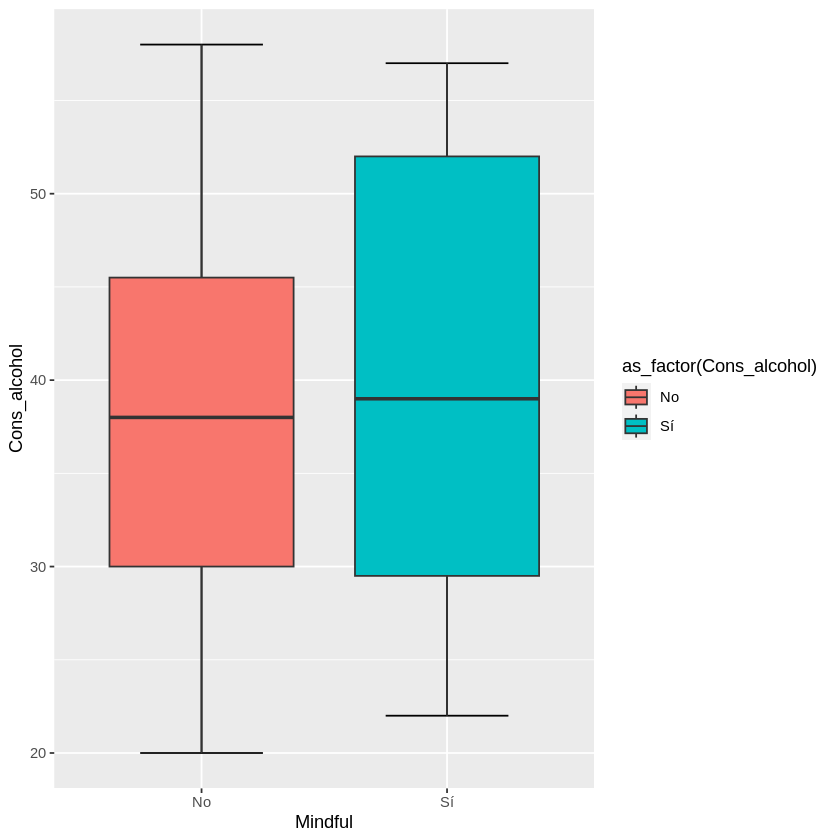

In [32]:
df %>%
  ggplot(aes(x = as_factor(Cons_alcohol), 
         y = Mindful, 
         fill = as_factor(Cons_alcohol))) +
  stat_boxplot(geom = "errorbar", width = 0.5) +
  geom_boxplot() +
  labs(x = "Mindful",
       y = "Cons_alcohol")

In [33]:
df %>%
  group_by(Cons_alcohol) %>%
  shapiro_test(Mindful) %>%
  mutate(Cons_alcohol = as_factor(Cons_alcohol),
         normal = case_when(p > .05 ~ T, T ~ F))

Cons_alcohol,variable,statistic,p,normal
<fct>,<chr>,<dbl>,<dbl>,<lgl>
No,Mindful,0.9673702,0.147381431,TRUE
Sí,Mindful,0.9063316,0.005106595,FALSE


La distribución de mindfulness en personas que reportaron no consumir alcohol semanalmente fue normal, SW=.97, p=.15, mientras que en aquellas que sí consumen fue no normal, SW=.91, p=.005. Por lo tanto, se usará el análisis no paramétrico de contraste de dos muestras independientes U de Mann Whitney.

In [36]:
df %>% 
  mutate(Cons_alcohol = as_factor(Cons_alcohol)) %>% 
  wilcox_test(Mindful ~ Cons_alcohol, detailed = T)

,estimate,.y.,group1,group2,n1,n2,statistic,p,conf.low,conf.high,method,alternative
,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,-2.999989,Mindful,No,Sí,54,36,856.5,0.343,-8.000077,2.000031,Wilcoxon,two.sided


El análisis de comparación resultó no significativo, U=856.5, p=.34 por lo que no existe diferencia en los puntajes de mindfulness entre quienes consumen alcohol semanalmente (Mdn=39, DE=12.00) y los/las que no (Mdn=38, DE=10.36).

En conclusión, no existe sustento para decir que el mindfulness varía según las/los participantes consuman, o no, alcohol semanalmente.

## Pregunta 3

Describe la muestra de acuerdo con las variables sociodemográficas reportadas y señala el tipo de variable y los estadísticos descriptivos que mejor brinden información sobre ellas (4 pts).

In [37]:
df %>%
  summarise(n = n(),
            mean = mean(Edad),
            sd = sd(Edad),
            min = min(Edad),
            "25%" = quantile(Edad, probs = .25),
            "50%" = quantile(Edad, probs = .50),
            "75%" = quantile(Edad, probs = .75),
            max = max(Edad))

n,mean,sd,min,25%,50%,75%,max
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90,49.8,5.91171,40,44,50,55,60


In [42]:
df %>% 
  group_by(Sexo) %>%
  summarise(n = n()) %>%
  mutate(Sexo = as_factor(Sexo),
         perc = n / sum(n))

Sexo,n,perc
<fct>,<int>,<dbl>
Mujer,49,0.5444444
Hombre,41,0.4555556


In [43]:
df %>% 
  group_by(Pareja) %>%
  summarise(n = n()) %>%
  mutate(Pareja = as_factor(Pareja),
         perc = n / sum(n))

Pareja,n,perc
<fct>,<int>,<dbl>
No,38,0.4222222
Si,52,0.5777778


In [44]:
df %>% 
  group_by(Cons_alcohol) %>%
  summarise(n = n()) %>%
  mutate(Cons_alcohol = as_factor(Cons_alcohol),
         perc = n / sum(n))

Cons_alcohol,n,perc
<fct>,<int>,<dbl>
No,54,0.6
Sí,36,0.4


- La edad es una variable continua y numérica por lo que es más adecuado considerar la media, es decir el promedio de las edades de las/los participantes. Para dispersión se consideraría la desviación estándar y los valores mínimo y máximo (rango).

- El sexo es una variable cualitativa y nominal por lo que resulta adecuado reportar las frecuencias o porcentajes de cada valor, mujer u hombre.

- Estar en una relación de pareja es una variable cualitativa y nominal por lo que sería adecuado indicar las frecuencias o porcentajes de quienes estén en una relación de pareja y las/los que no lo están.

- El consumo de alcohol es una variable cualitativa y nominal. Como en el caso anterior, se reportaría las frecuencias o porcentajes de quienes consumen alcohol semanalmente y quienes no.

>Descripción: La muestra estuvo compuesta por 90 personas en la adultez media, 54.4% mujeres y 45.6% hombres, con edades entre 40 a 60 años (M=49.8, DE=5.91). El 57.8% reportó encontrarse en una relación de pareja mientras que el 42.2% no lo está. Finalmente, el 40% indicó consumir algún tipo de alcohol semanalmente, mientras que el 60% no lo hace.